# Explore here

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # Import splitting function early
from sklearn.tree import DecisionTreeClassifier # Import model early
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # Import metrics early
import pandas.plotting # Import plotting explicitly

In [23]:
# --- 1. Load the Data ---
print("--- Loading Data ---")
data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')
pd.set_option('display.max_columns', None)
print("Data loaded successfully.")
print(data.head())

--- Loading Data ---
Data loaded successfully.
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [24]:
# --- 2. Initial Inspection and Basic Cleaning (standard NaNs, Duplicates) ---
print("\n--- Initial Inspection ---")
data.info()
print("\nMissing Values Count (Initial):")
print(data.isnull().sum())
data.dropna(inplace=True) # Removes rows with standard NaNs (likely none)
print("\nMissing Values Count (after dropna):")
print(data.isnull().sum())
print("\nDuplicate Rows Count:")
print(data.duplicated().sum())
data = data.drop_duplicates().reset_index(drop = True) # Removes duplicates (likely none)
print("\nData shape after initial cleaning:", data.shape)


--- Initial Inspection ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Missing Values Count (Initial):
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0

In [25]:
# --- 3. Handle Impossible Zero Values (Remove Rows) ---
# Based on EDA, 0 in these columns is biologically impossible. Removing these rows.
print("\n--- Handling Impossible Zero Values (Remove Rows) ---")
print("--- Data Shape Before Removing Impossible Zeros ---")
print(data.shape) # Should be (768, 9) at this point

# List of columns to check for zero values that are impossible
features_to_check_zeros = ['Glucose', 'BloodPressure', 'BMI']

# Remove rows where Glucose is 0
data = data[data['Glucose'] != 0]

# Remove rows where BloodPressure is 0
data = data[data['BloodPressure'] != 0]

# Remove rows where BMI is 0
data = data[data['BMI'] != 0]

# Reset index after removing rows
data = data.reset_index(drop=True)

print("\n--- Data Shape After Removing Impossible Zeros ---")
print(data.shape) # *** This shape should now be less than (768, 9) ***
print("\nData Head After Removing Impossible Zeros ---")
print(data.head())



--- Handling Impossible Zero Values (Remove Rows) ---
--- Data Shape Before Removing Impossible Zeros ---
(768, 9)

--- Data Shape After Removing Impossible Zeros ---
(724, 9)

Data Head After Removing Impossible Zeros ---
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  



--- Exploratory Data Analysis (EDA) ---

--- Univariate Analysis ---

Analyzing Distribution of Numerical Features:

Analyzing: Pregnancies


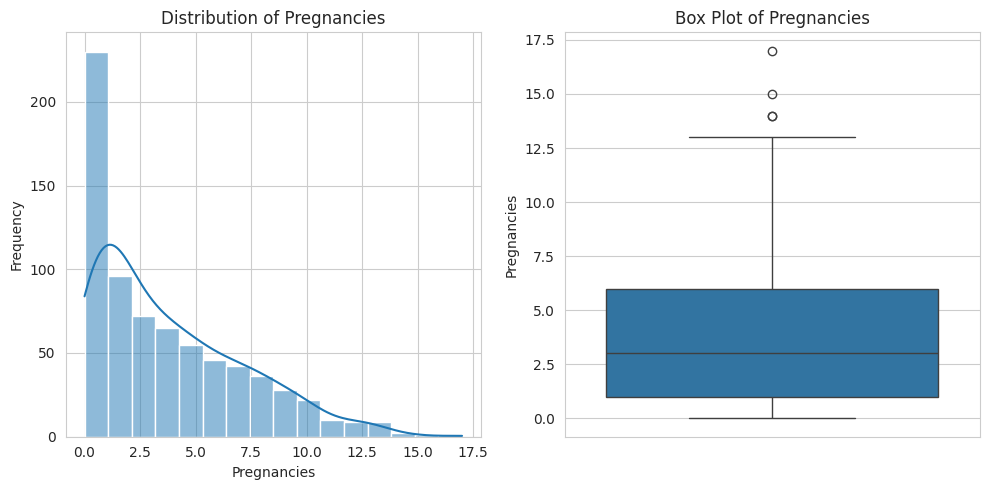


Analyzing: Glucose


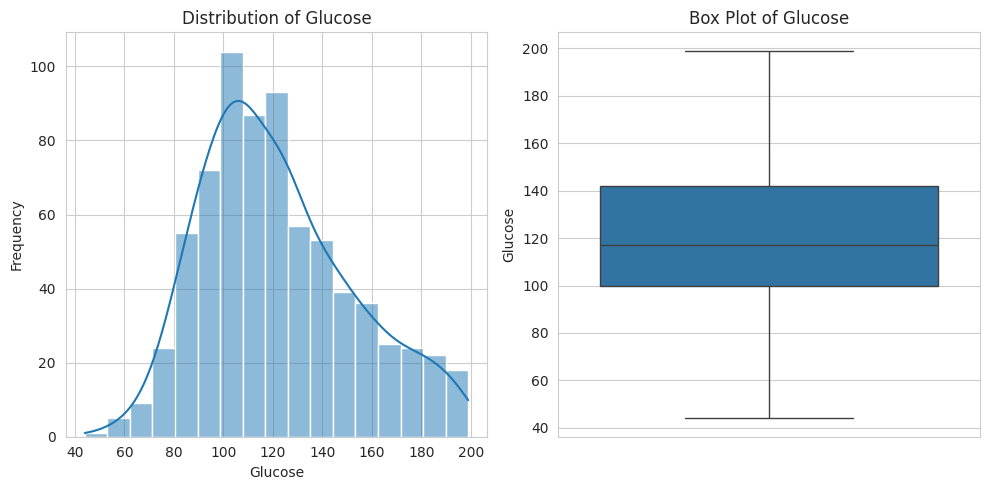


Analyzing: BloodPressure


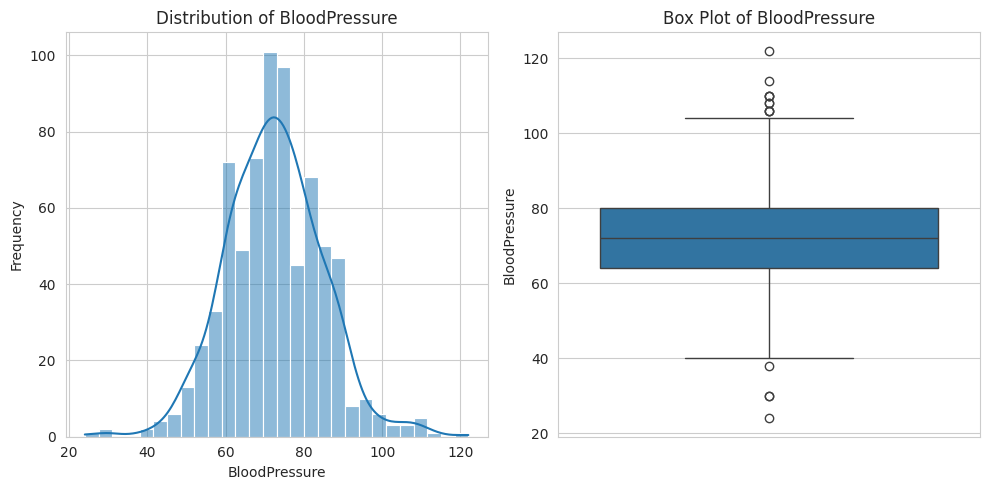


Analyzing: SkinThickness


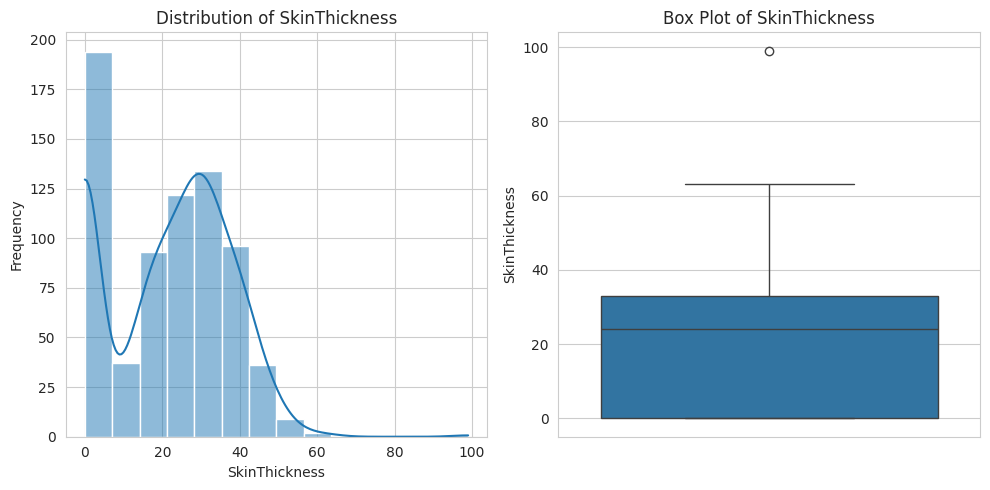


Analyzing: Insulin


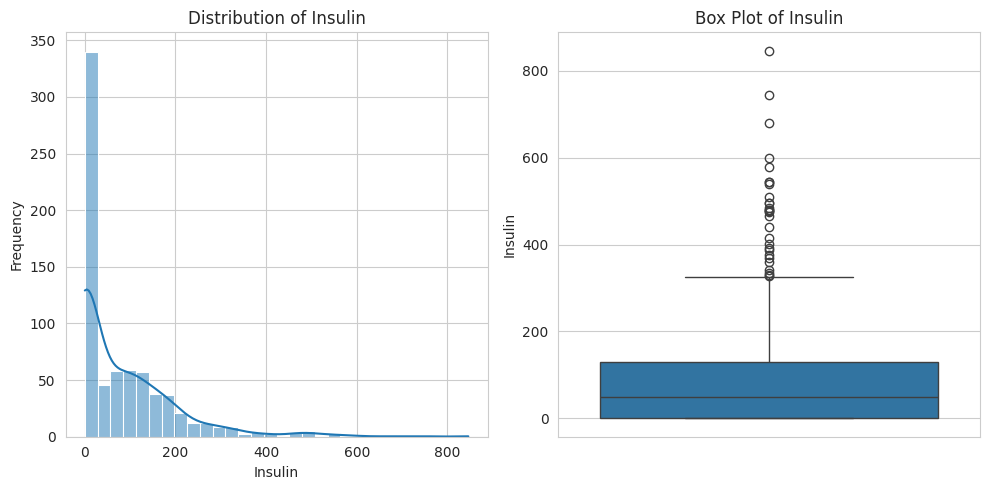


Analyzing: BMI


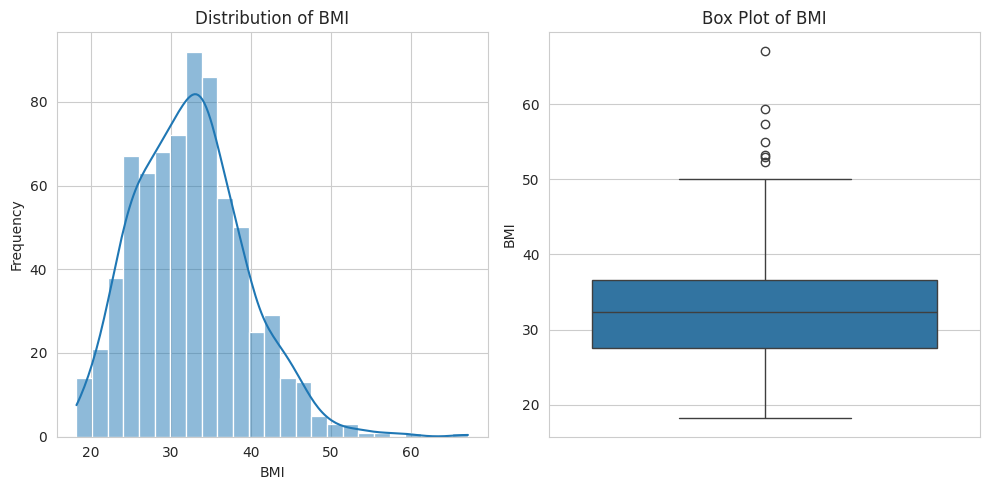


Analyzing: DiabetesPedigreeFunction


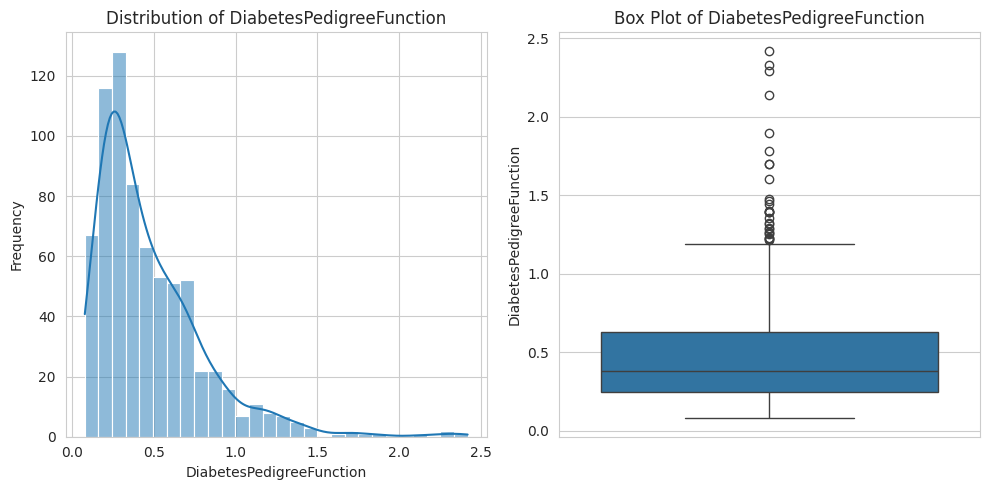


Analyzing: Age


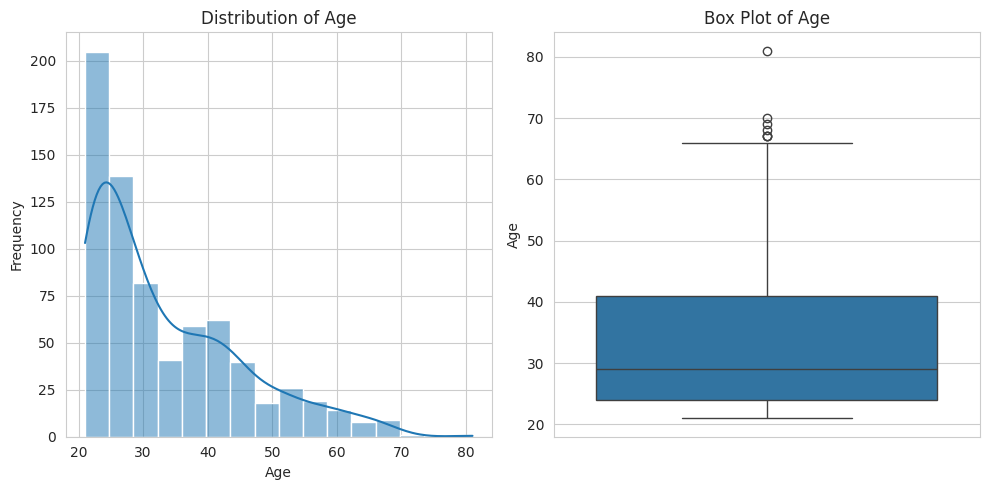


Analyzing Distribution of Target Variable ('Outcome'):


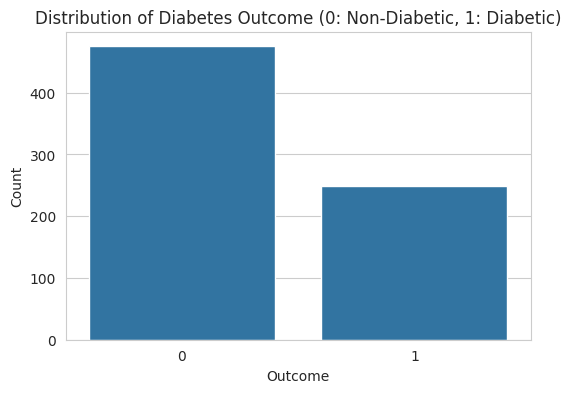


Target Variable Distribution (Percentage):
Outcome
0    65.607735
1    34.392265
Name: proportion, dtype: float64

--- Numerical-Numerical Analysis: Correlation Matrix ---


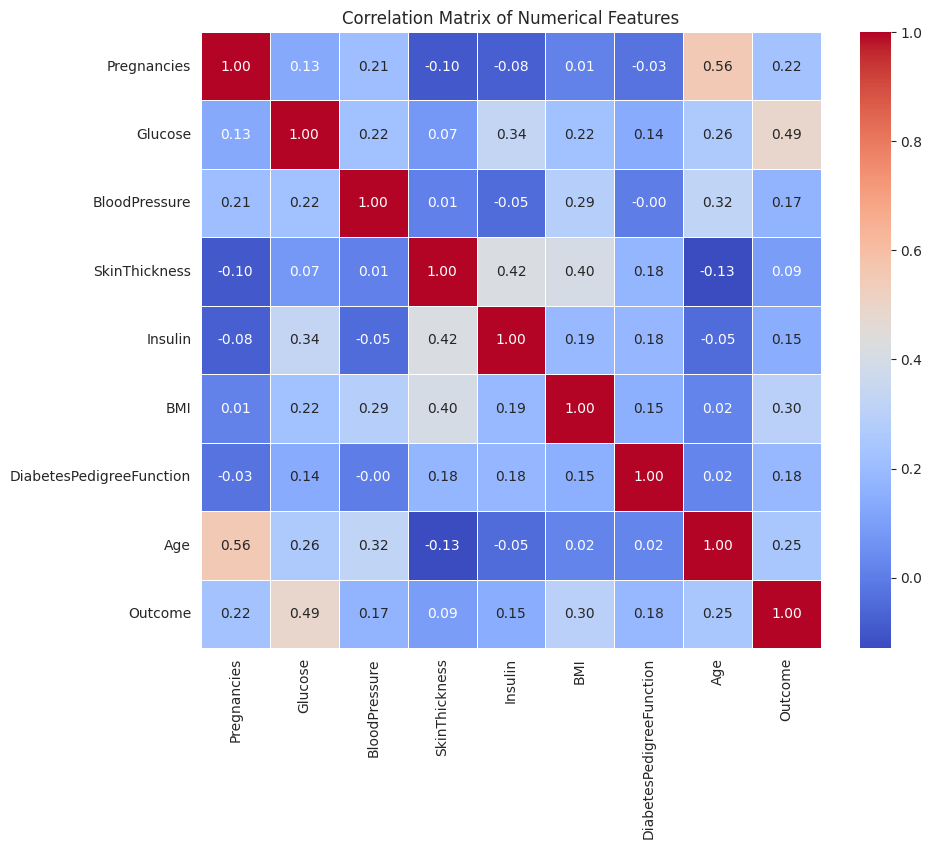


--- Numerical-Numerical Analysis: Scatter Plots ---


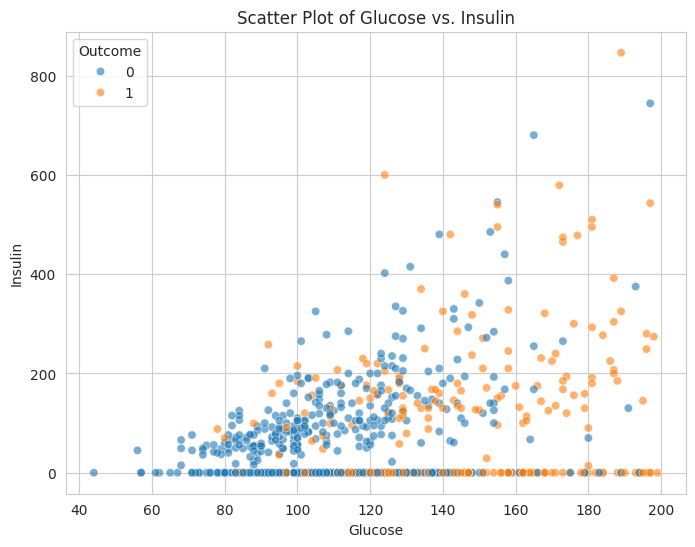

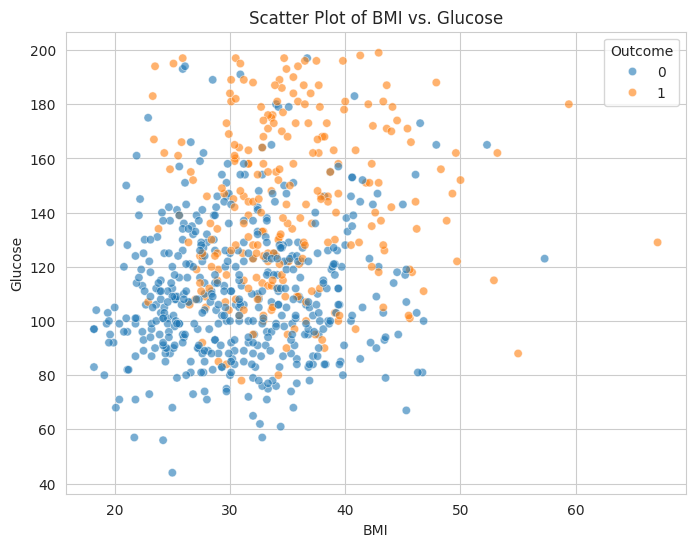


--- Numerical-Categorical Analysis ---

Analyzing Distribution of Numerical Features by Outcome:

Analyzing: Pregnancies vs Outcome


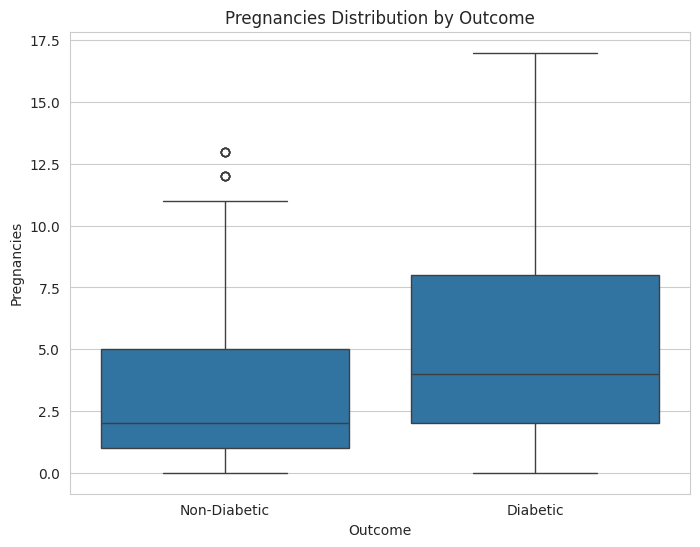


Analyzing: Glucose vs Outcome


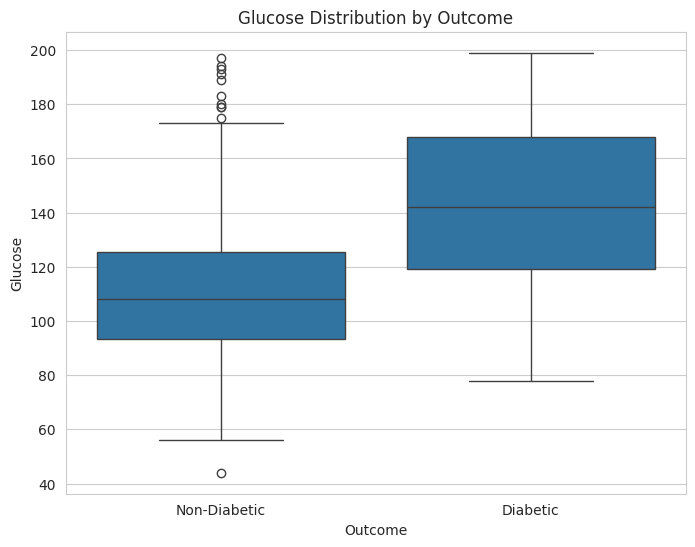


Analyzing: BloodPressure vs Outcome


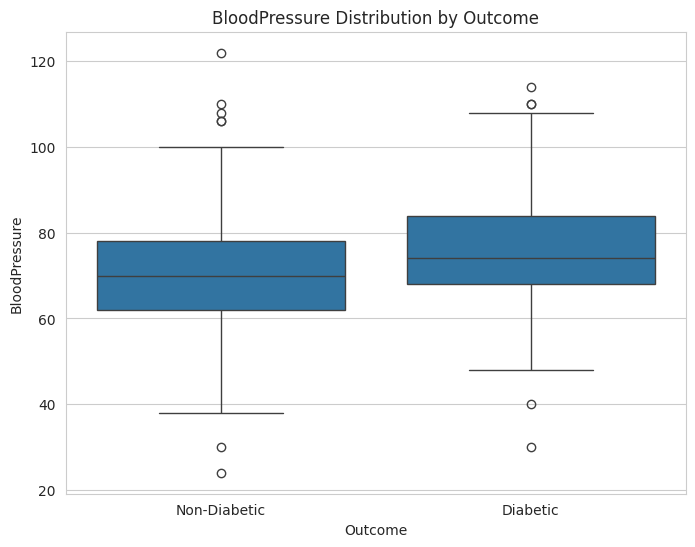


Analyzing: SkinThickness vs Outcome


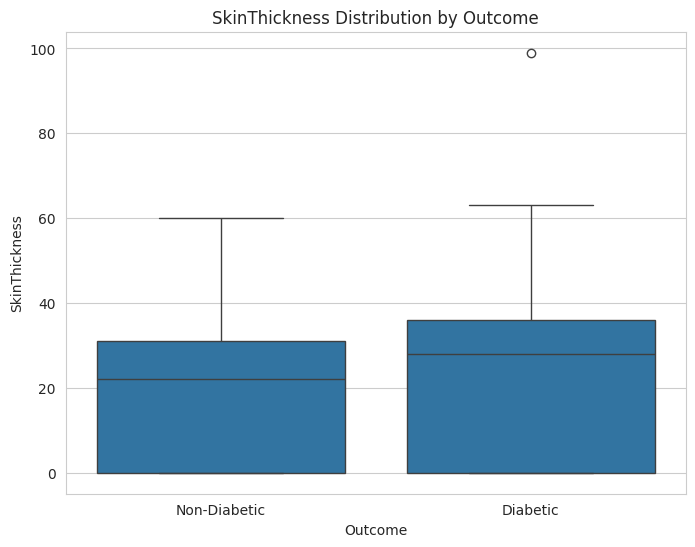


Analyzing: Insulin vs Outcome


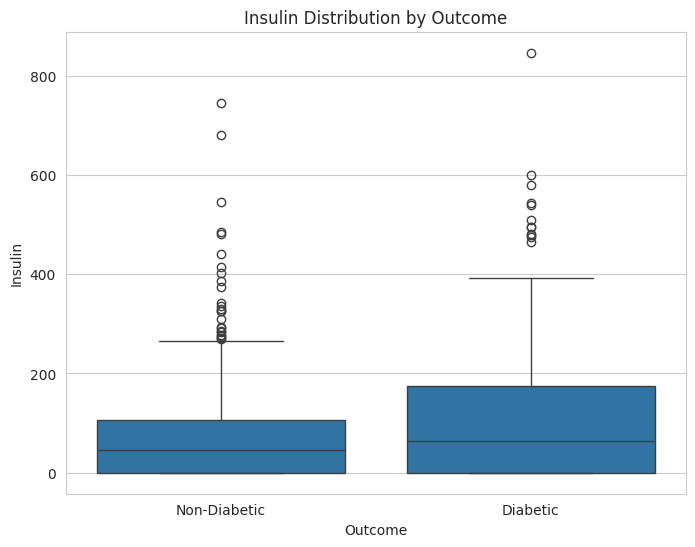


Analyzing: BMI vs Outcome


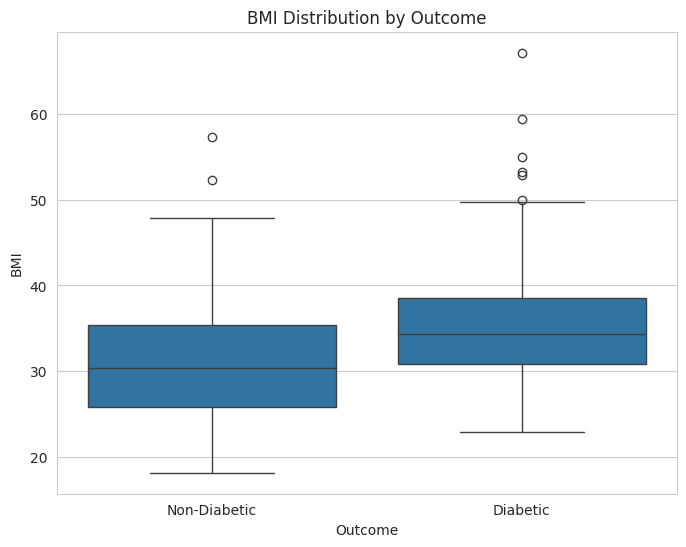


Analyzing: DiabetesPedigreeFunction vs Outcome


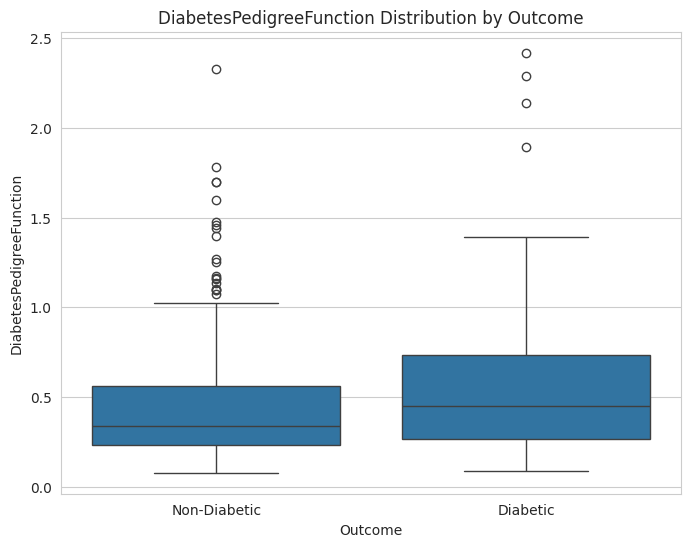


Analyzing: Age vs Outcome


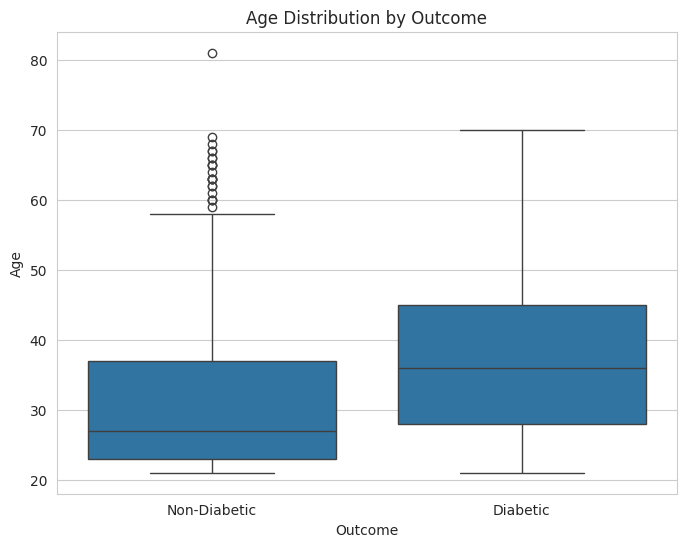


--- Generating Parallel Coordinates Plot ---


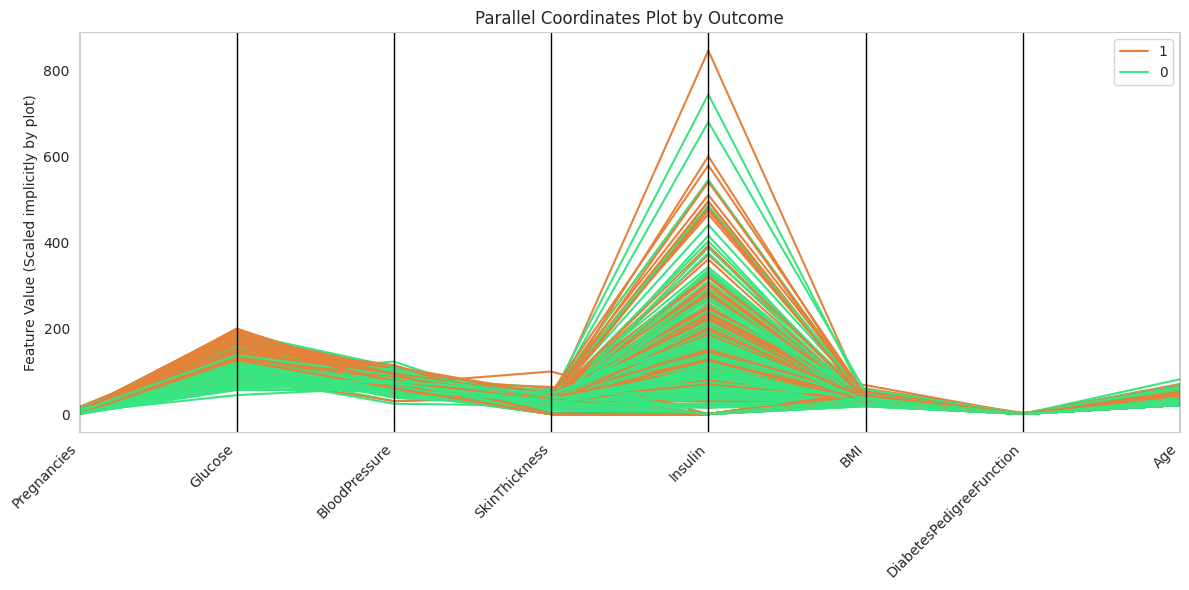

In [26]:
# --- 4. Exploratory Data Analysis (EDA) ---

print("\n--- Exploratory Data Analysis (EDA) ---")
sns.set_style("whitegrid")

# Univariate Analysis
print("\n--- Univariate Analysis ---")
numerical_features = data.select_dtypes(include=np.number).columns.tolist()
if 'Outcome' in numerical_features:
    numerical_features.remove('Outcome')

print("\nAnalyzing Distribution of Numerical Features:")
for feature in numerical_features:
    print(f"\nAnalyzing: {feature}")
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[feature])
    plt.title(f'Box Plot of {feature}')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

# Target Variable Analysis
print("\nAnalyzing Distribution of Target Variable ('Outcome'):")
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=data)
plt.title('Distribution of Diabetes Outcome (0: Non-Diabetic, 1: Diabetic)')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()
print("\nTarget Variable Distribution (Percentage):")
print(data['Outcome'].value_counts(normalize=True) * 100)

# Numerical-Numerical Analysis (Correlation)
print("\n--- Numerical-Numerical Analysis: Correlation Matrix ---")
numerical_data = data.select_dtypes(include=np.number)
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Numerical-Numerical Analysis (Scatter Plots)
print("\n--- Numerical-Numerical Analysis: Scatter Plots ---")
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Glucose', y='Insulin', hue='Outcome', data=data, alpha=0.6)
plt.title('Scatter Plot of Glucose vs. Insulin')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='BMI', y='Glucose', hue='Outcome', data=data, alpha=0.6)
plt.title('Scatter Plot of BMI vs. Glucose')
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.show()

# Numerical-Categorical Analysis (Box Plots)
print("\n--- Numerical-Categorical Analysis ---")
target_variable = 'Outcome'
print(f"\nAnalyzing Distribution of Numerical Features by {target_variable}:")
for feature in numerical_features:
    print(f"\nAnalyzing: {feature} vs {target_variable}")
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=target_variable, y=feature, data=data)
    plt.title(f'{feature} Distribution by {target_variable}')
    plt.xlabel(target_variable)
    plt.ylabel(feature)
    plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])
    plt.show()

# Parallel Coordinates Plot (Optional EDA Visualization)
print("\n--- Generating Parallel Coordinates Plot ---")
X_for_plot = data.drop('Outcome', axis=1)
y_for_plot = data['Outcome']
total_data_plot = X_for_plot.copy() # Use a different variable name to avoid confusion
total_data_plot["Outcome"] = y_for_plot
colors = ["#E58139", "#39E581"]

plt.figure(figsize=(12, 6))
try:
    pandas.plotting.parallel_coordinates(total_data_plot, "Outcome", color=colors)
    plt.title('Parallel Coordinates Plot by Outcome')
    plt.ylabel('Feature Value (Scaled implicitly by plot)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error generating parallel coordinates plot: {e}")

In [27]:
# --- 5. Split the Data ---
print("\n--- Splitting Data into Training and Testing Sets ---")
# Define features (X) and target (y) from the CLEANED data
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")



--- Splitting Data into Training and Testing Sets ---
Training features shape: (543, 8)
Testing features shape: (181, 8)
Training target shape: (543,)
Testing target shape: (181,)


In [28]:
# --- 6. Build and Train the Model ---
print("\n--- Building and Training the Decision Tree Model ---")
# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42) # Default parameters initially

# Train the model using the training data
model.fit(X_train, y_train)
print("Decision Tree Model trained successfully.")
print(f"Model parameters: {model.get_params()}")



--- Building and Training the Decision Tree Model ---
Decision Tree Model trained successfully.
Model parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}


In [29]:
# --- 7. Evaluate the Model ---
print("\n--- Evaluating the Decision Tree Model ---")
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


--- Evaluating the Decision Tree Model ---

Accuracy: 0.7514

Confusion Matrix:
[[104  22]
 [ 23  32]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       126
           1       0.59      0.58      0.59        55

    accuracy                           0.75       181
   macro avg       0.71      0.70      0.70       181
weighted avg       0.75      0.75      0.75       181




--- Visualizing the Trained Decision Tree ---


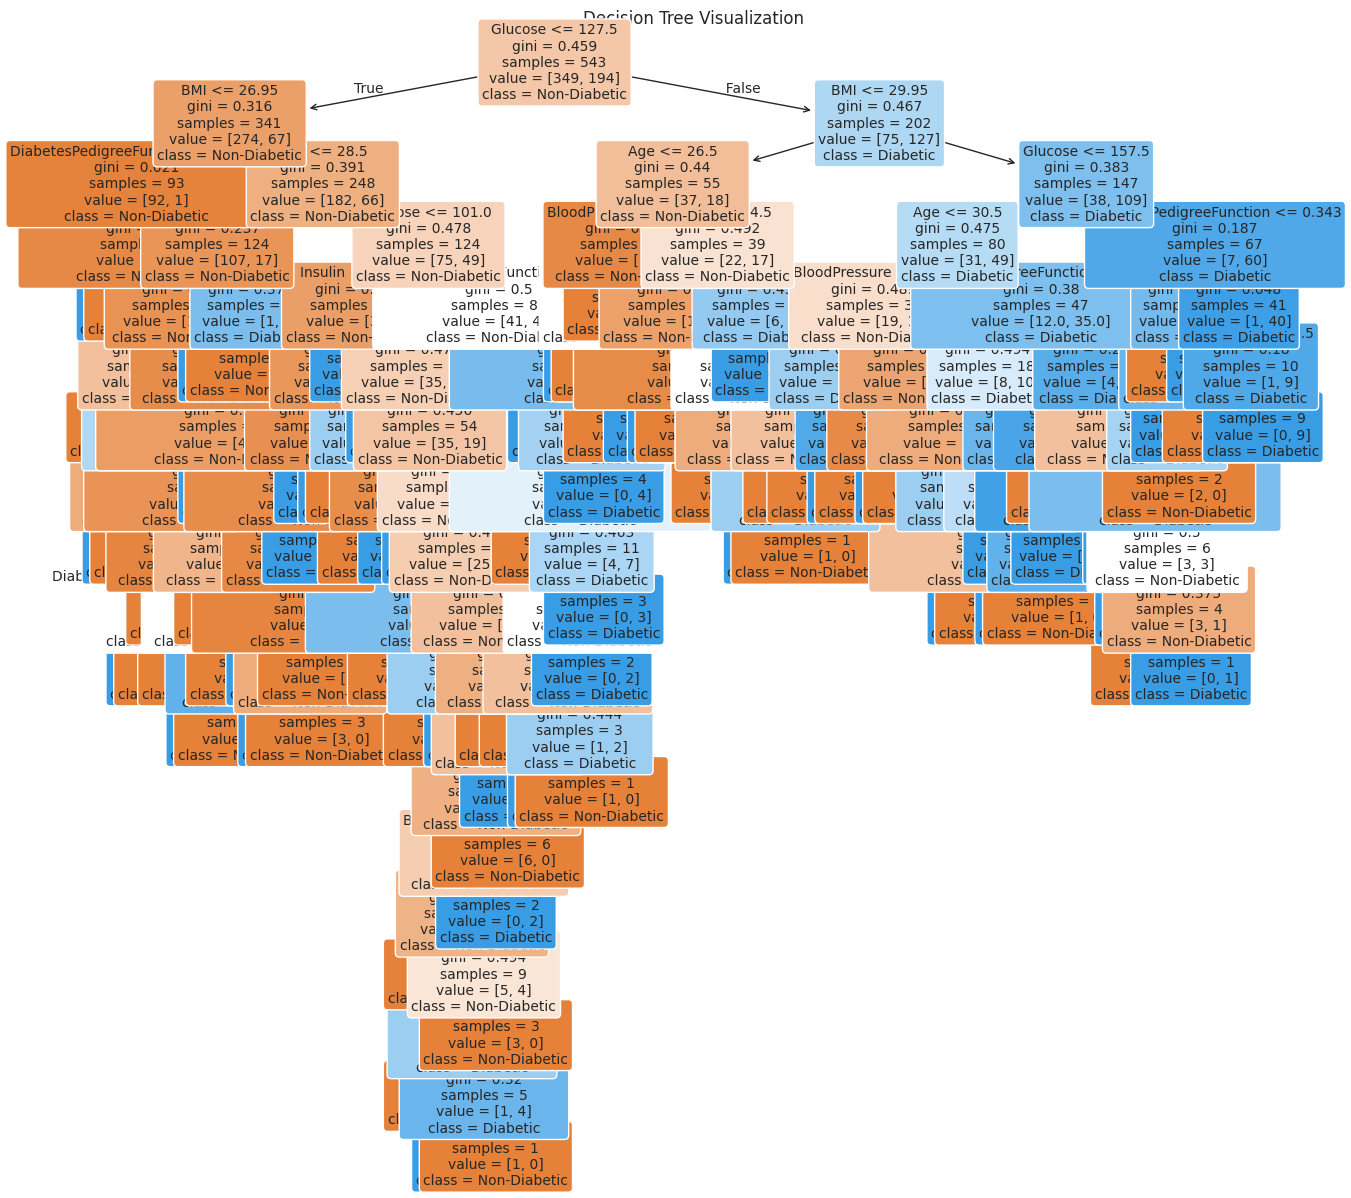

Decision Tree visualization generated.


In [30]:
import matplotlib.pyplot as plt
from sklearn import tree

print("\n--- Visualizing the Trained Decision Tree ---")

fig = plt.figure(figsize=(15, 15))

# Correct class_names for your two classes (0 and 1)
class_names = ["Non-Diabetic", "Diabetic"] # Or simply ["0", "1"]

tree.plot_tree(model,
               feature_names=list(X_train.columns), # Use feature names from your training data
               class_names=class_names,
               filled=True, # Color the nodes based on the majority class
               rounded=True, # Give nodes rounded corners
               fontsize=10) # Adjust font size if needed

plt.title("Decision Tree Visualization")
plt.show()

print("Decision Tree visualization generated.")

In [31]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

print("\n--- Performing Hyperparameter Tuning with GridSearchCV ---")

# 1. Define the Decision Tree model
# We'll use the same random_state for reproducibility
model = DecisionTreeClassifier(random_state=42)


--- Performing Hyperparameter Tuning with GridSearchCV ---


In [32]:
# 2. Define the grid of hyperparameters to search
# We'll explore different values for max_depth, min_samples_split, and min_samples_leaf
param_grid = {
    'max_depth': [3, 5, 7, 10, None], # Try different maximum depths, including no limit (None)
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 3, 5]    # Minimum number of samples required at a leaf node
}

In [33]:
# 3. Define the cross-validation strategy
# StratifiedKFold is good for classification to preserve the percentage of samples for each class
# in each fold. We'll use 5 folds.
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [34]:
# 4. Initialize GridSearchCV
# estimator: the model we want to tune
# param_grid: the grid of hyperparameters to search
# cv: the cross-validation strategy
# scoring: the metric to optimize (e.g., 'accuracy', 'recall', 'f1'). Let's start with accuracy.
# n_jobs: number of cores to use for parallel processing (-1 uses all available cores)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv_strategy, scoring='accuracy', n_jobs=-1)

In [35]:
# 5. Fit GridSearchCV to the training data
# This will train and evaluate the model for each hyperparameter combination across all folds
grid_search.fit(X_train, y_train)

print("\nGridSearchCV completed.")



GridSearchCV completed.


In [36]:
# 6. Get the best parameters and best score found by GridSearchCV
print(f"\nBest parameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")


Best parameters found: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best cross-validation accuracy: 0.7385


In [37]:
# 7. Get the best model (the one trained with the best parameters)
best_model = grid_search.best_estimator_

In [38]:
# 8. Evaluate the best model on the unseen test data
print("\n--- Evaluating the Best Model on the Test Set ---")
y_pred_tuned = best_model.predict(X_test)

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
class_report_tuned = classification_report(y_test, y_pred_tuned)

print(f"\nAccuracy of the tuned model on the test set: {accuracy_tuned:.4f}")
print("\nConfusion Matrix of the tuned model:")
print(conf_matrix_tuned)
print("\nClassification Report of the tuned model:")
print(class_report_tuned)


--- Evaluating the Best Model on the Test Set ---

Accuracy of the tuned model on the test set: 0.7459

Confusion Matrix of the tuned model:
[[104  22]
 [ 24  31]]

Classification Report of the tuned model:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       126
           1       0.58      0.56      0.57        55

    accuracy                           0.75       181
   macro avg       0.70      0.69      0.70       181
weighted avg       0.74      0.75      0.74       181



In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("\n--- Building and Training the Default Random Forest Model ---")

# Initialize the Random Forest Classifier
# n_estimators: the number of trees in the forest (default is 100)
# random_state: for reproducibility
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model using the training data
rf_model.fit(X_train, y_train)

print("\nDefault Random Forest Model trained successfully!")

# --- Evaluating the Default Random Forest Model ---
print("\n--- Evaluating the Default Random Forest Model ---")

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics

# 1. Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nAccuracy: {accuracy_rf:.4f}")

# 2. Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:")
print(conf_matrix_rf)

# 3. Classification Report
class_report_rf = classification_report(y_test, y_pred_rf)
print("\nClassification Report:")
print(class_report_rf)


--- Building and Training the Default Random Forest Model ---



Default Random Forest Model trained successfully!

--- Evaluating the Default Random Forest Model ---

Accuracy: 0.7680

Confusion Matrix:
[[106  20]
 [ 22  33]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       126
           1       0.62      0.60      0.61        55

    accuracy                           0.77       181
   macro avg       0.73      0.72      0.72       181
weighted avg       0.77      0.77      0.77       181




--- Visualizing Individual Trees from the Random Forest ---


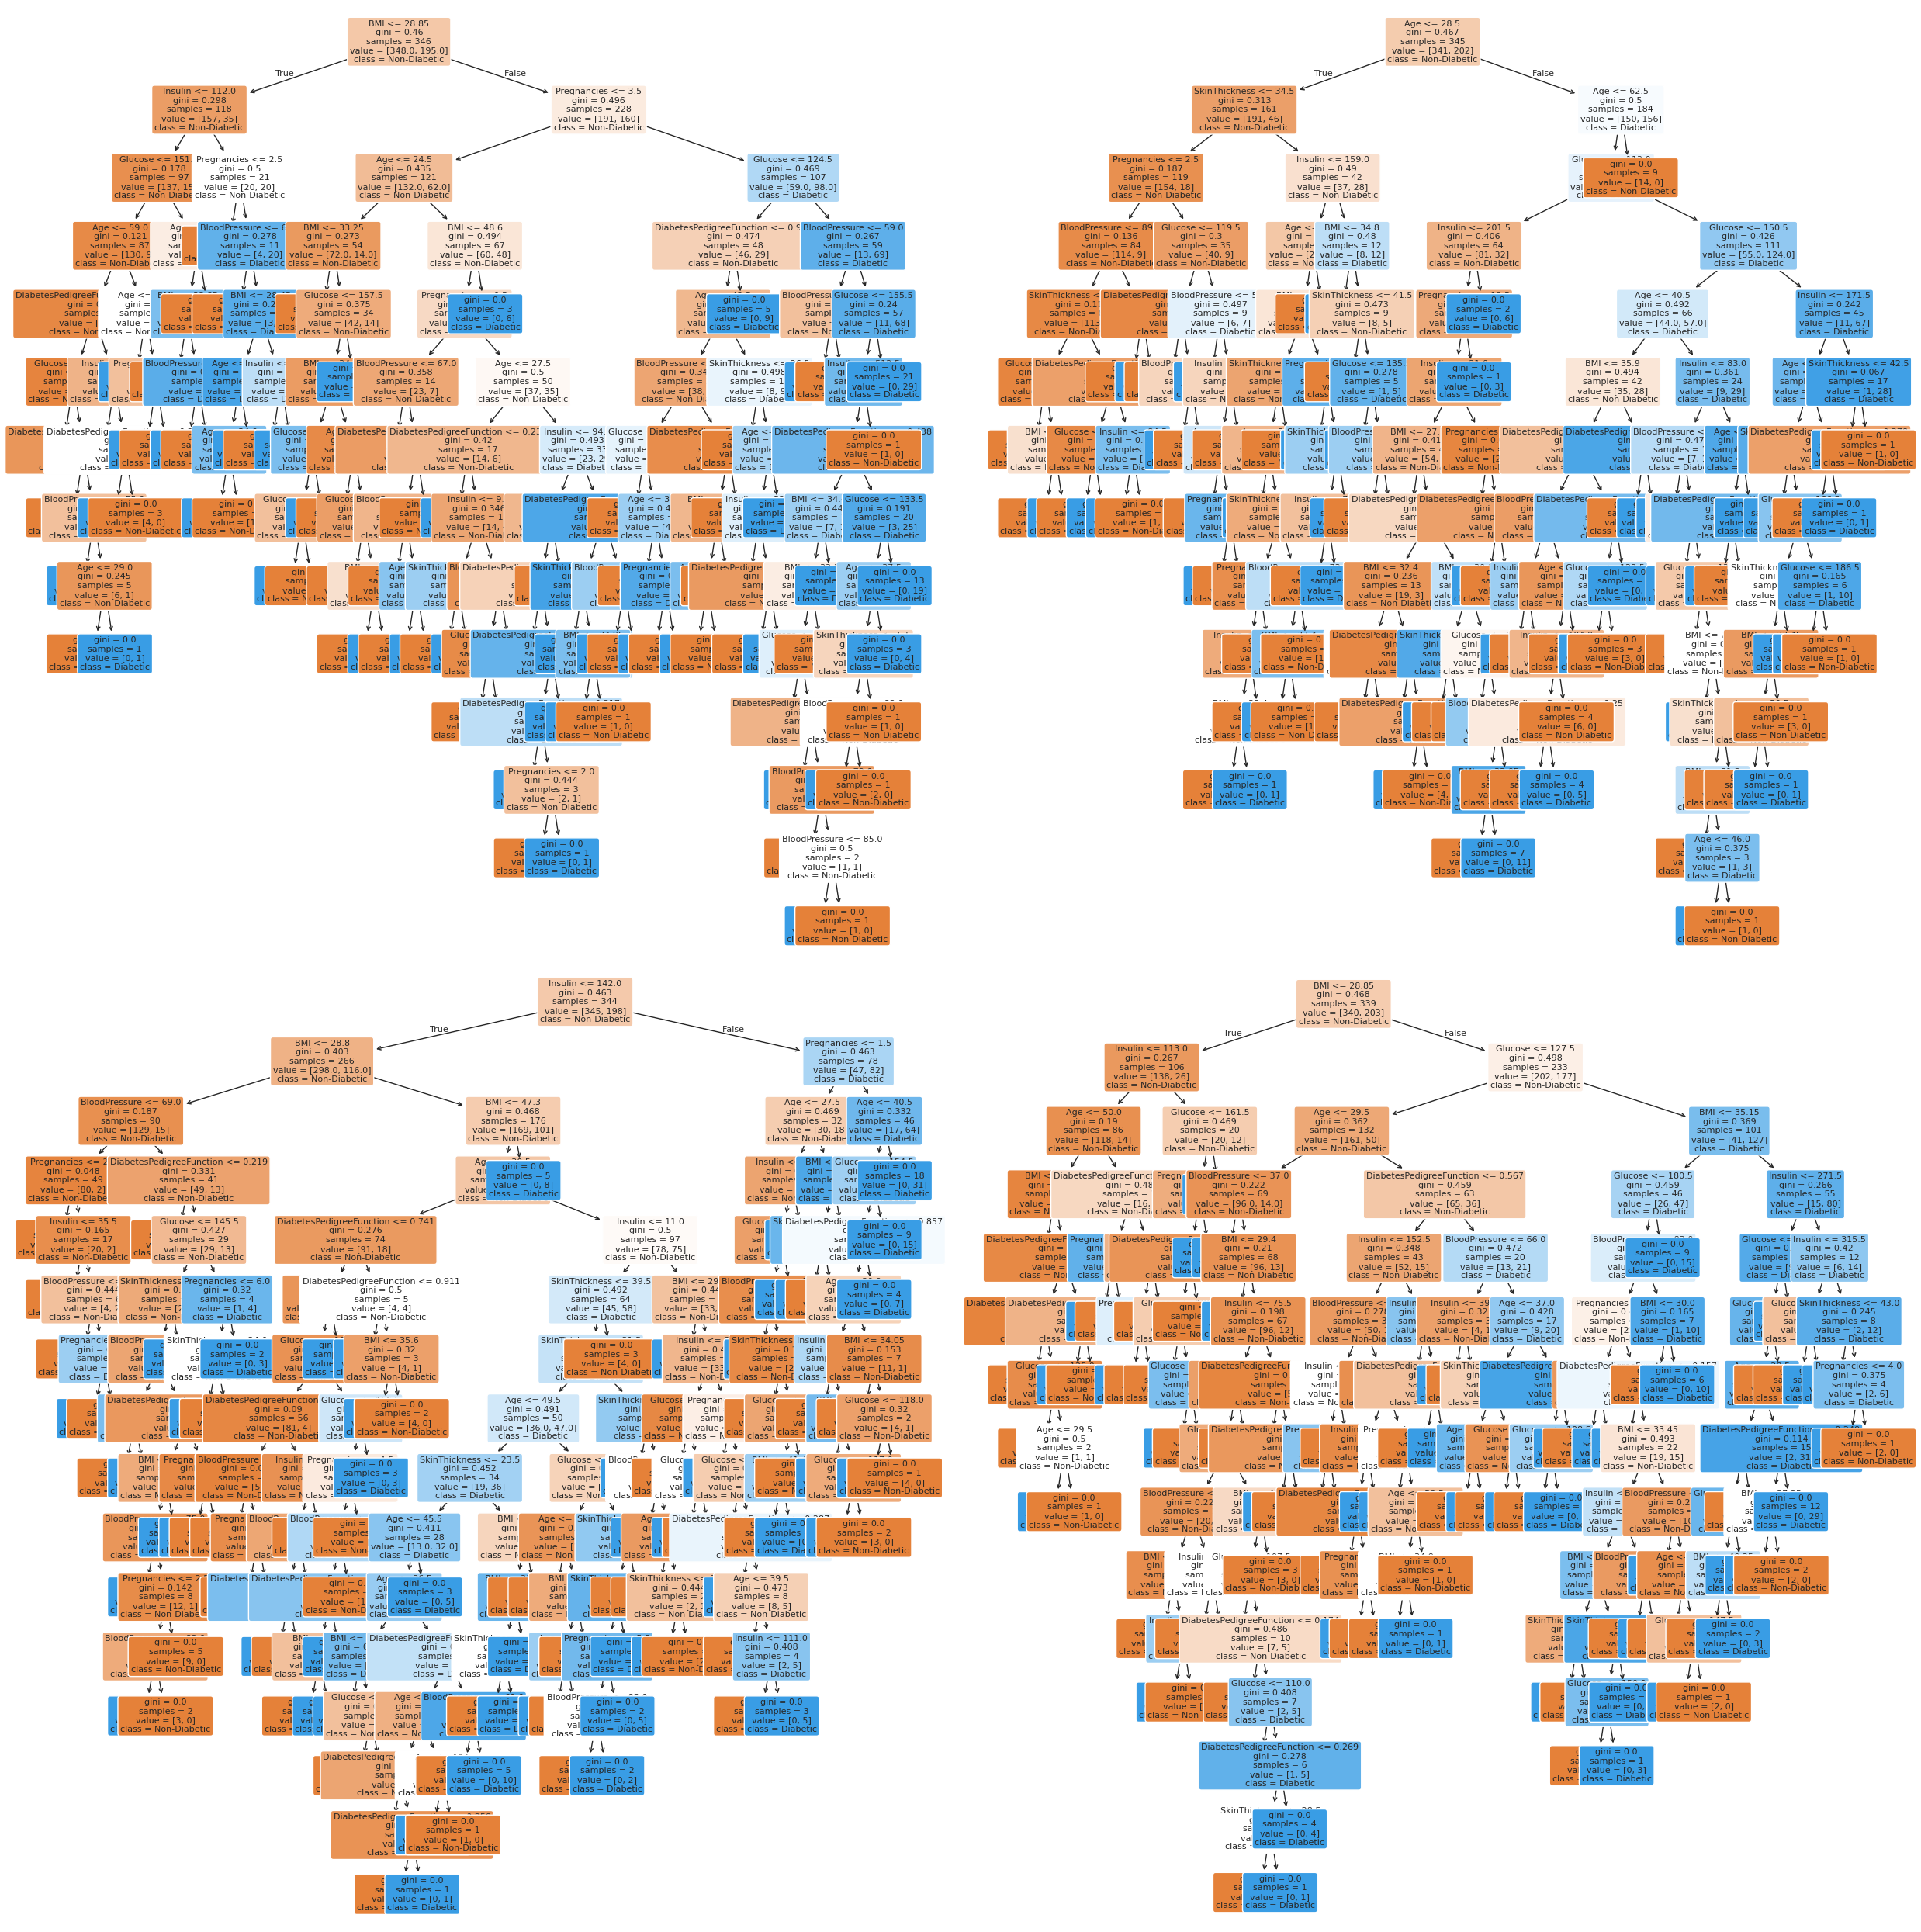

Individual Random Forest tree visualizations generated.


In [40]:
import matplotlib.pyplot as plt
from sklearn import tree

print("\n--- Visualizing Individual Trees from the Random Forest ---")

# Create a figure and a 2x2 grid of subplots with a larger figsize
fig, axes = plt.subplots(2, 2, figsize=(25, 25)) # Increased figure size further

# Define class names for your two classes
class_names = ["Non-Diabetic", "Diabetic"]

# Flatten the axes array to easily iterate through subplots
axes = axes.flatten()

# We show the first 4 trees
for i in range(4):
    # Plot the i-th tree in the i-th subplot
    # Ensure rf_model is defined from the previous training step
    if 'rf_model' in locals():
        tree.plot_tree(rf_model.estimators_[i],
                       ax=axes[i],
                       feature_names=list(X_train.columns),
                       class_names=class_names,
                       filled=True,
                       rounded=True,
                       fontsize=8) # You might need to adjust fontsize again
    else:
        print("Error: rf_model is not defined. Please train the Random Forest model first.")
        break # Exit the loop if model is not found


plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

print("Individual Random Forest tree visualizations generated.")

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming rf_model has been trained in your current session
# Assuming X_test and y_test are defined from the splitting step

print("\n--- Evaluating the Default Random Forest Model ---")

# Make predictions on the test set using the trained Random Forest model (rf_model)
# Ensure rf_model is defined and fitted before running this code block
# If you are unsure if rf_model is fitted, run the training code just before this.
try:
    y_pred_rf = rf_model.predict(X_test)
    print("Predictions made using the Random Forest model.")

    # Calculate evaluation metrics using predictions from rf_model (y_pred_rf)
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    print(f"\nAccuracy: {accuracy_rf:.4f}")

    conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
    print("\nConfusion Matrix:")
    print(conf_matrix_rf)

    class_report_rf = classification_report(y_test, y_pred_rf)
    print("\nClassification Report:")
    print(class_report_rf)

except NameError:
    print("\nError: rf_model is not defined. Please ensure you have run the Random Forest training code first.")
except Exception as e:
    print(f"\nAn error occurred during evaluation: {e}")


--- Evaluating the Default Random Forest Model ---
Predictions made using the Random Forest model.

Accuracy: 0.7680

Confusion Matrix:
[[106  20]
 [ 22  33]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       126
           1       0.62      0.60      0.61        55

    accuracy                           0.77       181
   macro avg       0.73      0.72      0.72       181
weighted avg       0.77      0.77      0.77       181



In [42]:
from pickle import dump

# Check the variable name - 'model' is for the Decision Tree, 'rf_model' is for the Random Forest
# Assuming you want to save the Default Random Forest model you just evaluated:
print("\n--- Saving the Default Random Forest Model ---")

try:
    # Use the correct variable name for the Random Forest model
    dump(rf_model, open("random_forest_classifier_default_42.sav", "wb"))
    print("Default Random Forest model saved successfully as 'random_forest_classifier_default_42.sav'")
except NameError:
    print("\nError: rf_model is not defined. Please ensure you have trained the Random Forest model first.")
except Exception as e:
    print(f"\nAn error occurred while saving the model: {e}")


--- Saving the Default Random Forest Model ---
Default Random Forest model saved successfully as 'random_forest_classifier_default_42.sav'


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score # Import accuracy_score
import pandas.plotting

# --- 1. Load the Data ---
print("--- Loading Data ---")
try:
    data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')
    pd.set_option('display.max_columns', None)
    print("Data loaded successfully.")
except Exception as e:
    print(f"Failed to load the dataset. Error: {e}")
    print("Please consider providing the dataset by uploading the file or pasting the data if the issue persists.")
    exit()

# --- 2. Initial Inspection and Basic Cleaning (standard NaNs, Duplicates) ---
print("\n--- Initial Inspection ---")
data.dropna(inplace=True)
data = data.drop_duplicates().reset_index(drop = True)
print("\nData shape after initial cleaning:", data.shape)

# --- 3. Handle Impossible Zero Values (Remove Rows) ---
print("\n--- Handling Impossible Zero Values (Remove Rows) ---")
print("--- Data Shape Before Removing Impossible Zeros ---")
print(data.shape)

features_to_check_zeros = ['Glucose', 'BloodPressure', 'BMI']

for feature in features_to_check_zeros:
    initial_rows = data.shape[0]
    data = data[data[feature] != 0]
    removed_rows = initial_rows - data.shape[0]
    print(f"Removed {removed_rows} rows where {feature} was 0.")

data = data.reset_index(drop=True)

print("\n--- Data Shape After Removing Impossible Zeros ---")
print(data.shape)

# --- Assuming EDA from previous step has been reviewed ---

# --- 5. Split the Data ---
print("\n--- Splitting Data into Training and Testing Sets ---")
X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

# --- 6. Implement Lasso Model (Regression) ---
print("\n--- Implementing Standard Lasso Regression Model ---")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("\nFeatures scaled successfully.")

# Initialize the Lasso model
lasso_model = Lasso(alpha=1.0, random_state=42) # Using alpha=1.0 as before

# Train the Lasso model
lasso_model.fit(X_train_scaled, y_train)
print("Standard Lasso Regression Model trained successfully.")

# --- 7. Evaluate the Lasso Model (Regression Metrics) ---
print("\n--- Evaluating the Standard Lasso Regression Model (Regression Metrics) ---")

# Make predictions on the test set (continuous output)
y_pred_lasso = lasso_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_lasso)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lasso)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

# Display the coefficients
print("\nLasso Model Coefficients:")
coefficients = pd.Series(lasso_model.coef_, index=X_train.columns)
print(coefficients)

print("\nFeatures selected by Lasso (non-zero coefficients):")
selected_features = coefficients[coefficients != 0]
print(selected_features)

# --- 8. Calculate "Accuracy" by Thresholding Predictions ---
print("\n--- Calculating 'Accuracy' using a Threshold ---")

# Apply a threshold (e.g., 0.5) to convert continuous predictions to binary labels
threshold = 0.5
y_pred_binary = (y_pred_lasso >= threshold).astype(int)

# Calculate accuracy using the binary predictions
accuracy_thresholded = accuracy_score(y_test, y_pred_binary)

print(f"\nClassification Accuracy (using threshold={threshold}): {accuracy_thresholded:.4f}")

# --- Optional: Display other classification metrics if needed ---
# from sklearn.metrics import classification_report
# print("\nClassification Report (using threshold):")
# print(classification_report(y_test, y_pred_binary))

--- Loading Data ---
Data loaded successfully.

--- Initial Inspection ---

Data shape after initial cleaning: (768, 9)

--- Handling Impossible Zero Values (Remove Rows) ---
--- Data Shape Before Removing Impossible Zeros ---
(768, 9)
Removed 5 rows where Glucose was 0.
Removed 35 rows where BloodPressure was 0.
Removed 4 rows where BMI was 0.

--- Data Shape After Removing Impossible Zeros ---
(724, 9)

--- Splitting Data into Training and Testing Sets ---
Training features shape: (543, 8)
Testing features shape: (181, 8)
Training target shape: (543,)
Testing target shape: (181,)

--- Implementing Standard Lasso Regression Model ---

Features scaled successfully.
Standard Lasso Regression Model trained successfully.

--- Evaluating the Standard Lasso Regression Model (Regression Metrics) ---
Mean Squared Error (MSE): 0.2144
Root Mean Squared Error (RMSE): 0.4630
R-squared (R2): -0.0135

Lasso Model Coefficients:
Pregnancies                 0.0
Glucose                     0.0
BloodPre

In [4]:
decision_tree_accuracy = 0.7459 # Accuracy provided by the user
random_forest_accuracy = 0.7680 # Accuracy provided by the user

print(f"Decision Tree Accuracy: {decision_tree_accuracy:.4f}")
print(f"Random Forest Accuracy: {random_forest_accuracy:.4f}")
print(f"Lasso (Thresholded) Accuracy: {lasso_thresholded_accuracy:.4f}")

# Determine the best performing model based on accuracy
accuracies = {
    "Decision Tree": decision_tree_accuracy,
    "Random Forest": random_forest_accuracy,
    "Lasso (Thresholded)": lasso_thresholded_accuracy
}

best_model = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_model]

print(f"\nBased on accuracy, the best performing model is the: {best_model} with an accuracy of {best_accuracy:.4f}")

Decision Tree Accuracy: 0.7459
Random Forest Accuracy: 0.7680
Lasso (Thresholded) Accuracy: 0.6961

Based on accuracy, the best performing model is the: Random Forest with an accuracy of 0.7680
